In [168]:
import pandas as pd

In [169]:
df_critics = pd.read_csv('critics-psql.csv', index_col='id')
df_films = pd.read_csv('films-psql.csv', index_col='id')
df_reviews = pd.read_csv('reviews-psql.csv', index_col='id')
df_directors = pd.read_csv('directors-psql.csv', index_col='id')
df_directions = pd.read_csv('directions-psql.csv', index_col='id')
df_countries = pd.read_csv('countries-psql.csv', index_col='id')

In [170]:
# Top 3 of the films appearing the most frequently on the top ten
df_reviews['film_id'].value_counts().head(3)

1     49
0     47
33    35
Name: film_id, dtype: int64

In [171]:
df_reviews.head(3)

,critic_id,film_id,rank
id,,,
0,0,0,0
1,0,1,1
2,0,2,2


In [172]:
df = df_reviews.merge(df_directions, on='film_id')
df.head()

,critic_id,film_id,rank,director_id
0,0,0,0,0
1,3,0,1,0
2,4,0,5,0
3,7,0,1,0
4,8,0,3,0


In [173]:
# How many times does Terrence Malick appear is the top ten and for which film
df[df['director_id'] == 2]['film_id'].value_counts()

2      23
124     7
15      1
548     1
Name: film_id, dtype: int64

In [174]:
# Get the names insted of the ids
df = df.merge(df_directors, left_on='director_id', right_index=True)

In [175]:
df['full_name'] = df['first_name'] + " " + df['last_name']

In [176]:
# How many times does David Lynch appear is the top ten and for which film
df[df['full_name'] == 'David Lynch']['film_id'].value_counts()

0     47
80     1
Name: film_id, dtype: int64

In [177]:
# Get the films title instead of the ids
df = df.merge(df_films, left_on='film_id', right_index=True)

In [178]:
df[df['full_name'] == 'David Lynch']['title'].value_counts()

Mulholland Drive    47
Inland Empire        1
Name: title, dtype: int64

In [179]:
df[df['full_name'] == 'Ethan Coen']['title'].value_counts()

No Country For Old Men        21
Inside Llewyn Davis           20
A Serious Man                  8
O Brother, Where Art Thou?     3
Name: title, dtype: int64

In [180]:
df.groupby('full_name')['title'].value_counts()

full_name                    title                                      
Abbas Kiarostami             Certified Copy                                  9
                             Ten                                             4
                             Like Someone In Love                            2
Abdellatif Kechiche          Blue Is the Warmest Color                       7
Abderrahmane Sissako         Timbuktu                                        9
                             Waiting for Happiness                           2
Adam Curtis                  The Century of the Self                         1
Adam McKay                   Anchorman: The Legend of Ron Burgundy           1
                             Step Brothers                                   1
                             Talladega Nights: The Ballad of Ricky Bobby     1
Agnieszka Holland            Burning Bush                                    1
Agnès Jaoui                  The Taste of Others          

In [181]:
# Who are the directors of the films directed by more than 2 people
(df.groupby('title')
 .apply(lambda x: x['full_name'])
 .groupby(level=0)
 .filter(lambda x: len(x.unique()) > 2)
 .groupby(level=0)
 .apply(lambda x: x.unique()))

title
7 Letters                             [Boo Junfeng, Eric Khoo, Jack Neo, K. Rajagopa...
Leviathan                             [Andrey Zvyagintsev, Lucien Castaing-Taylor, V...
Madagascar 3: Europe's Most Wanted           [Eric Darnell, Tom McGrath, Conrad Vernon]
Monsters, Inc.                              [Lee Unkrich, Pete Docter, David Silverman]
Name: full_name, dtype: object

In [182]:
# Who are the directors who work in couple
(df.groupby('title')
 .apply(lambda x: x['full_name'])
 .groupby(level=0)
 .filter(lambda x: len(x.unique()) == 2)
 .groupby(level=0)
 .apply(lambda x: x.unique()))

title
5 Broken Cameras                                                             [Emad Burnat, Guy Davidi]
A Serious Man                                                                  [Joel Coen, Ethan Coen]
Ajami                                                                     [Scandar Copti, Yaron Shani]
American Splendor                                              [Robert Pulcini, Shari Springer Berman]
Anomalisa                                                              [Charlie Kaufman, Duke Johnson]
Captain America: Winter Soldier                                             [Anthony Russo, Joe Russo]
City of God                                                           [Fernando Meirelles, Kátia Lund]
Crank                                                                   [Mark Neveldine, Brian Taylor]
Frozen                                                                      [Chris Buck, Jennifer Lee]
Gett: The Trial of Viviane Amselem                                 

In [183]:
# The films that have the most of 1st rank
df[df['rank'] == 0]['title'].value_counts().head(3)

Mulholland Drive          16
In the Mood for Love      13
No Country For Old Men     8
Name: title, dtype: int64

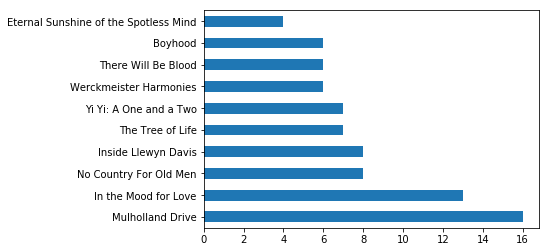

In [184]:
%matplotlib inline
df[df['rank'] == 0]['title'].value_counts().head(10).plot(kind='barh')

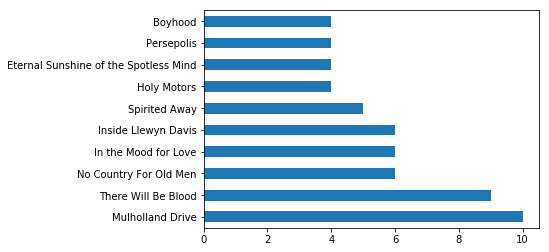

In [185]:
df[df['rank'] == 1]['title'].value_counts().head(10).plot(kind='barh')

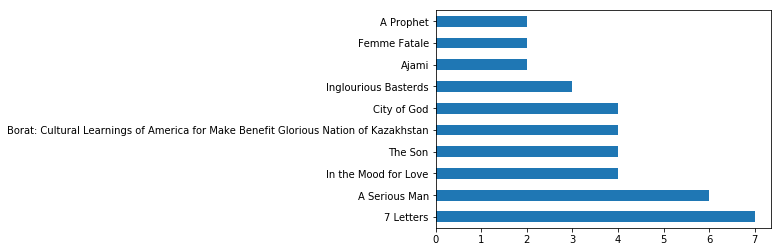

In [186]:
df[df['rank'] == 9]['title'].value_counts().head(10).plot(kind='barh')

In [234]:
# Films directed by brothers
def get_browsers(row):
    # Get the list of directors, get rid of the duplications
    directors = row['director_id'].unique()
    # Take the movie only if two people directed it
    if len(directors) == 2:
        # If these two people have the same last name, print them
        if df_directors.iloc[directors[0]]['last_name'] == df_directors.iloc[directors[1]]['last_name']:
            return (df_directors.iloc[directors[0]]['first_name'] + " " + df_directors.iloc[directors[0]]['last_name']
                    + ", " + df_directors.iloc[directors[1]]['first_name'] + " " + df_directors.iloc[directors[1]]['last_name'])

df.groupby('title').apply(get_browsers).dropna()


title
A Serious Man                                      Joel Coen, Ethan Coen
Captain America: Winter Soldier                 Anthony Russo, Joe Russo
Gett: The Trial of Viviane Amselem       Ronit Elkabetz, Shlomi Elkabetz
Heaven Knows What                              Josh Safdie, Benny Safdie
Inside Llewyn Davis                                Joel Coen, Ethan Coen
No Country For Old Men                             Joel Coen, Ethan Coen
O Brother, Where Art Thou?                         Joel Coen, Ethan Coen
The Child                             Jean-Pierre Dardenne, Luc Dardenne
The Son                               Jean-Pierre Dardenne, Luc Dardenne
dtype: object